<a href="https://colab.research.google.com/github/YitbarekWedajo/DS-Unit-2-Linear-Models/blob/master/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', parse_dates=['created'],
                 index_col='created')
assert df.shape == (49352, 33)

In [4]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48818 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   description           47393 non-null  object 
 3   display_address       48685 non-null  object 
 4   latitude              48818 non-null  float64
 5   longitude             48818 non-null  float64
 6   price                 48818 non-null  int64  
 7   street_address        48808 non-null  object 
 8   interest_level        48818 non-null  object 
 9   elevator              48818 non-null  int64  
 10  cats_allowed          48818 non-null  int64  
 11  hardwood_floors       48818 non-null  int64  
 12  dogs_allowed          48818 non-null  int64  
 13  doorman               48818 non-null  int64  
 14  dishwasher            48818 non-nul

In [6]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


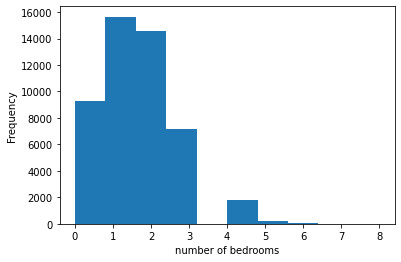

In [8]:
import matplotlib.pyplot as plt
df['bedrooms'].plot(kind = 'hist')
plt.xlabel('number of bedrooms');

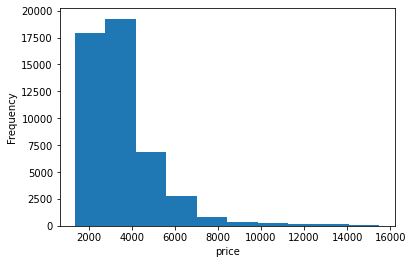

In [9]:
df['price'].plot(kind = 'hist')
plt.xlabel('price');

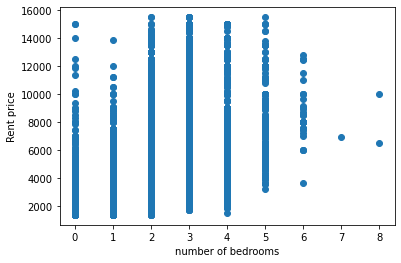

In [10]:
# See if there is a linear relationship between feature and traget 
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('number of bedrooms')
plt.ylabel('Rent price');

In [12]:
# Split target from our feature matrix
#Target
y=df['price']
#Feature
X= df[['bedrooms']]

In [13]:
# Establish baseline 
from sklearn.metrics import mean_absolute_error
baseline_pred = [y.mean()] * len(y)
print('Baseline MAE:', mean_absolute_error(y, baseline_pred))

Baseline MAE: 1201.5251847945751


In [14]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

In [15]:
#Instantiate this model

model = LinearRegression()

In [16]:
# Fit the model

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#make prediction 
y_pred = model.predict(X)
y_pred

array([4827.73665176, 3974.48248423, 3121.22831671, ..., 3121.22831671,
       2267.97414918, 3974.48248423])

In [20]:
#check our metrics
MAE = mean_absolute_error(y, y_pred)
print ("Our model's error is ", MAE)

Our model's error is  975.6559731054491


In [21]:
#find coeffient
model.coef_

array([853.25416753])

In [22]:
#find y-intercept 
model.intercept_

2267.9741491780505

In [23]:
# Write a function that predicts rent for given number of bedrooms
def predict_rent(bedrooms):
    y_pred = model.predict([[bedrooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    print (int(estimate), "is our estimated rent for", int(bedrooms), "bedrooms in Tribeca.")

In [24]:
#let us predict rent for three bedrooms using the function
predict_rent(3)

4827 is our estimated rent for 3 bedrooms in Tribeca.


In [25]:
#Let us find the formula of line of best fit
print(f'Rent_PRICE = {model.intercept_} + {model.coef_[0]} x bedrooms')

Rent_PRICE = 2267.9741491780505 + 853.2541675274308 x bedrooms
